# Imports

In [1]:
import API_functions.file_single as fs
import API_functions.Soils.column_batch_process as fb
import API_functions.file_info as fi
import API_functions.pre_process as pp
import API_functions.threshold_position_independent as tpi
import API_functions.__others as dy

In [2]:
import os
import numpy as np
import nibabel as nib

# A quick check about the method

Image size: (2371, 3168, 4)
Image is BGR color
Getting information completed!


error: OpenCV(4.8.1) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xd8611878::Set<3,4,-1>,struct cv::impl::A0xd8611878::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


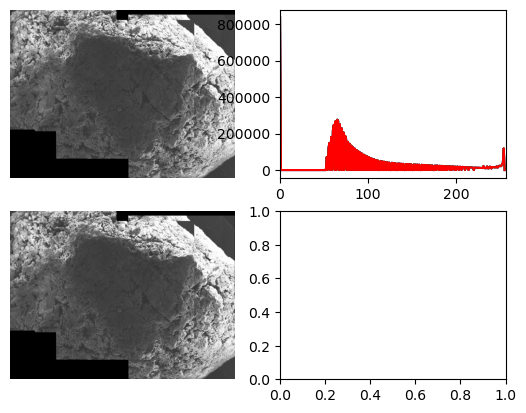

In [5]:
# Read image
single_path = "d:/6 Downloads/"
file_name = "New Project.png"
image = fs.read_image_opencv(str(os.path.join(single_path, file_name)))
fs.show_image(image, 4, (2, 2, 1))

# Get image info
fi.get_info(image)
hist = fi.calculate_hist(image)
fi.plot_hist(hist, 4, (2, 2, 2))

# Pre-process image
image_prepropossed = pp.median(image, kernel_size=3)
fs.show_image(image_prepropossed, 4, (2, 2, 3))

# Threshold image
# image_threshold = tpi.user_threshold(image_prepropossed, 120)
image_threshold = tpi.kmeans_3d(image_prepropossed)
fs.show_image(image_threshold, 4, (2, 2, 4))

# Work with the method above

## 3.4 Pre-process and Get its Threshold

## 3.5 Get nii File

In [12]:
name_nii = "soil_column_2__int16_cutted_1"
# listPart1 = fb.get_image_names("e:/3.Experimental_Data/Soil.column.2/0201/5.Threshold/", my_image_names=None, image_format="png")
# listPart2 = fb.get_image_names("e:/3.Experimental_Data/Soil.column.2/0202/5.Threshold/", my_image_names=None, image_format="png")
# listPart3 = fb.get_image_names("e:/3.Experimental_Data/Soil.column.2/0203/5.Threshold/", my_image_names=None, image_format="png")
# listPart4 = fb.get_image_names("e:/3.Experimental_Data/Soil.column.2/0204/5.Threshold/", my_image_names=None, image_format="png")
# listPart5 = fb.get_image_names("e:/3.Experimental_Data/Soil.column.2/0205/5.Threshold/", my_image_names=None, image_format="png")

# combine_list = listPart1 + listPart2 + listPart3 + listPart4 + listPart5

path_nii = "e:/3.Experimental_Data/Soil.column.2/"
fb.create_nifti(data_array, path_nii, name_nii)

Save Done!


## 3.6 Paint and Get nii File

In [20]:
# for i in range(1, 6):
i = 1
path_nii = "e:/3.Experimental_Data/Soil.column.2/"
listPart = eval(f"listPart{i}")
name_nii = f"soil_column_2__{i}"
painted_volume, connection_part_list = dy.dying_color_optimized(listPart, 100, 5)

100%|██████████| 2581/2581 [00:06<00:00, 423.99it/s]


2581 images have been read
Reading completely!


c:\Users\laish\miniconda3\envs\dpln39\lib\site-packages\cupy\_creation\from_data.py:88: PerformanceWarning: Using synchronous transfer as pinned memory (13214720000 bytes) could not be allocated. This generally occurs because of insufficient host memory. The original error was: cudaErrorMemoryAllocation: out of memory
  return _core.array(a, dtype, False, order, blocking=blocking)


Number of features: 33736


100%|██████████| 8861/8861 [1:31:26<00:00,  1.61it/s]


In [29]:
name_nii = f"soil_column_2__1_{i}"
fb.create_nifti(painted_volume, path_nii, name_nii)

Save Done!


In [30]:
# del image, image_prepropossed, image_threshold
# import numpy as np
# np.sum(painted_volume)
# temp = painted_volume[:,:,1001]
# connection_part_list

# convey painted_volume to ndarray int 32 type
painted_volume = np.array(painted_volume, dtype=np.int64)

MemoryError: Unable to allocate 12.3 GiB for an array with shape (800, 800, 2581) and data type int64

In [4]:
nifti_file = nib.load('e:/3.Experimental_Data/Soil.column.2/soil_column_2__1_1.nii')
data_array = nifti_file.get_fdata()


In [7]:
data_array = np.array(data_array, dtype=np.int16)


In [10]:

import cupy as cp
from tqdm import tqdm

In [11]:

for i in tqdm(range(data_array.shape[2])):
    slice_data = np.array(data_array[:, :, i])  # Convert to NumPy array
    slice_data_cp = cp.asarray(slice_data)  # Convert to CuPy array

    # Set values of 50 to 0 using CuPy
    slice_data_cp[slice_data_cp == 50] = 0

    # Convert back to NumPy array and update the original data
    data_array[:, :, i] = cp.asnumpy(slice_data_cp)

print("Completed setting all values of 50 to 0 with GPU acceleration.")

  0%|          | 0/2581 [00:00<?, ?it/s]

100%|██████████| 2581/2581 [00:05<00:00, 471.20it/s]

Completed setting all values of 50 to 0 with GPU acceleration.


# 4. Column Analysis
## 4.1 Get the left and right surface of the image

In [3]:
list_renamed = fb.get_image_names("e:/3.Experimental_Data/Soil.column.2/0205/5.Threshold/", my_image_names=None, image_format="png")
fb.get_left_right_surface(list_renamed, name="surface", path="e:/3.Experimental_Data/Soil.column.2/0205/6.Surfaces/")

3252 images have been found in e:/3.Experimental_Data/Soil.column.2/0205/5.Threshold/
The first 3 images are:
e:/3.Experimental_Data/Soil.column.2/0205/5.Threshold\002_ou_DongYing_12261_processed.png
e:/3.Experimental_Data/Soil.column.2/0205/5.Threshold\002_ou_DongYing_12262_processed.png
e:/3.Experimental_Data/Soil.column.2/0205/5.Threshold\002_ou_DongYing_12263_processed.png
Warning, your files are too large to read all.
Get names completely!


  0%|          | 0/3252 [00:00<?, ?it/s]

100%|██████████| 3252/3252 [00:06<00:00, 527.65it/s]


3252 images have been read
Reading completely!
Left and Right Surface Saved Completely!


## 4.2 Porosity Curve

2581 images have been found in e:/3.Experimental_Data/Soil.column.2/0201/5.Threshold/
The first 3 images are:
e:/3.Experimental_Data/Soil.column.2/0201/5.Threshold\002_ou_DongYing_00001_processed.png
e:/3.Experimental_Data/Soil.column.2/0201/5.Threshold\002_ou_DongYing_00002_processed.png
e:/3.Experimental_Data/Soil.column.2/0201/5.Threshold\002_ou_DongYing_00003_processed.png
Warning, your files are too large to read all.
Get names completely!
3287 images have been found in e:/3.Experimental_Data/Soil.column.2/0202/5.Threshold/
The first 3 images are:
e:/3.Experimental_Data/Soil.column.2/0202/5.Threshold\002_ou_DongYing_02582_processed.png
e:/3.Experimental_Data/Soil.column.2/0202/5.Threshold\002_ou_DongYing_02583_processed.png
e:/3.Experimental_Data/Soil.column.2/0202/5.Threshold\002_ou_DongYing_02584_processed.png
Warning, your files are too large to read all.
Get names completely!
3201 images have been found in e:/3.Experimental_Data/Soil.column.2/0203/5.Threshold/
The first 3 imag

100%|██████████| 15512/15512 [02:07<00:00, 122.10it/s]


15512 images have been read
Reading completely!


19it [00:08,  2.15it/s]


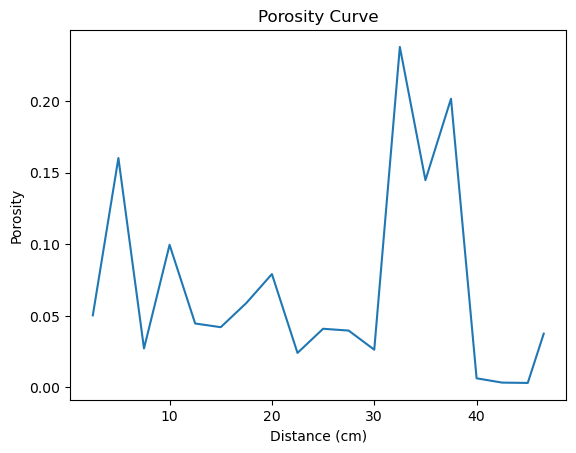

In [3]:
# list_renamed = fb.get_image_names("e:/3.Experimental_Data/Soil.column.2/0205/5.Threshold/", my_image_names=None, image_format="png")

listPart1 = fb.get_image_names("e:/3.Experimental_Data/Soil.column.2/0201/5.Threshold/", my_image_names=None, image_format="png")
listPart2 = fb.get_image_names("e:/3.Experimental_Data/Soil.column.2/0202/5.Threshold/", my_image_names=None, image_format="png")
listPart3 = fb.get_image_names("e:/3.Experimental_Data/Soil.column.2/0203/5.Threshold/", my_image_names=None, image_format="png")
listPart4 = fb.get_image_names("e:/3.Experimental_Data/Soil.column.2/0204/5.Threshold/", my_image_names=None, image_format="png")
listPart5 = fb.get_image_names("e:/3.Experimental_Data/Soil.column.2/0205/5.Threshold/", my_image_names=None, image_format="png")

combine_list = listPart1 + listPart2 + listPart3 + listPart4 + listPart5

curve = fb.get_porosity_curve(combine_list, scan_resolution_um=30, minimal_body_value_cm=2.5)
fb.draw_porosity_curve(curve)

In [4]:
import csv

# export the curve to csv file
with open('e:/3.Experimental_Data/Soil.column.2/porosity_curve.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Depth (cm)", "Porosity (%)"])
    for row in curve:
        writer.writerow(row)